In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

#df = pd.read_csv('D:/AWIS/Semester_03/SFP/Webscraper_Autoscout/SFP_Workspace/car_data_csv.csv',sep=';')
df = pd.read_csv('C:/Dev/VSCode/sf/SFP_Notebook/car_data_csv.csv',sep=';')

df.describe(include='all')
# df.dtypes


,Verbrauch,Hersteller,CO₂-Emissionen2,Fahrzeughalter,Schadstoffklasse,Barzahlungspreis,Sitzplätze,Türen,Kilometerstand,Erstzulassung,HU,Leistung,Getriebe,Kraftstoff,Außenfarbe
count,504.000000,504,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504,504,504
unique,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,15
top,NaN,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Schaltgetriebe,Benzin,Schwarz
freq,NaN,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,355,365,134
mean,6.413889,NaN,154.984127,1.912698,4.988095,10499.734127,4.861111,4.666667,117919.289683,11.202381,18.861111,98.456349,NaN,NaN,NaN
std,1.923984,NaN,47.863164,0.913951,0.928806,3994.871660,0.805397,0.746097,71024.089473,5.867211,7.804301,36.156580,NaN,NaN,NaN
min,3.000000,NaN,0.000000,1.000000,3.000000,1100.000000,2.000000,3.000000,10.000000,0.000000,0.000000,37.000000,NaN,NaN,NaN
25%,5.100000,NaN,120.000000,1.000000,4.000000,7497.500000,5.000000,5.000000,68000.000000,6.000000,15.000000,74.000000,NaN,NaN,NaN
50%,5.900000,NaN,140.000000,2.000000,5.000000,11890.000000,5.000000,5.000000,107250.000000,10.500000,24.000000,92.000000,NaN,NaN,NaN
75%,7.400000,NaN,178.250000,2.000000,6.000000,13980.000000,5.000000,5.000000,151821.000000,16.000000,24.000000,115.000000,NaN,NaN,NaN


In [ ]:
#Beschreibung der Verbrauchsverteilung in Liter
df.Verbrauch.describe()

In [29]:
#Unterteilung des Datensatzes in Benzin, Diesel und Gas Kraftfahrzeuge
benzinkfz = df[df['Kraftstoff'] == 'Benzin']
dieselkfz = df[df['Kraftstoff'] == 'Diesel']
gaskfz = df[df['Kraftstoff'] == 'Gas']

In [41]:
benzinkfz.Verbrauch.describe()

count    365.000000
mean       6.656712
std        1.875534
min        3.300000
25%        5.200000
50%        6.200000
75%        7.600000
max       13.300000
Name: Verbrauch, dtype: float64

In [42]:
dieselkfz.Verbrauch.describe()

count    130.000000
mean       5.796923
std        1.904256
min        3.000000
25%        4.500000
50%        5.200000
75%        6.800000
max       11.900000
Name: Verbrauch, dtype: float64

In [ ]:
gaskfz.Verbrauch.describe()

In [40]:
#Gibt die Anzahl der KFZ der unterschiedlichen Kraftstoffe aus
anzahl_benzin_kfz = df['Kraftstoff'].value_counts()['Benzin']
anzahl_diesel_kfz = df['Kraftstoff'].value_counts()['Diesel']
anzahl_gas_kfz = df['Kraftstoff'].value_counts()['Gas']

print(f"Anzahl der Benzin-KFZ: {anzahl_benzin_kfz}")
print(f"Anzahl der Diesel-KFZ: {anzahl_diesel_kfz}")
print(f"Anzahl der Gas-KFZ: {anzahl_gas_kfz}")

Anzahl der Benzin-KFZ: 365
Anzahl der Diesel-KFZ: 130
Anzahl der Gas-KFZ: 9


In [43]:
#Ausgabe Spannweite und Quartilsabstand des Verbrauchs bei Benzin KFZ

lagemasseb= benzinkfz.Verbrauch.describe()
spannweiteb= lagemasseb["max"]- lagemasseb["min"]
quartilsabstandb = lagemasseb["75%"] - lagemasseb["25%"]

print (spannweiteb)
print (quartilsabstandb)

10.0
2.3999999999999995


In [44]:
#Ausgabe Spannweite und Quartilsabstand des Verbrauchs bei Diesel KFZ

lagemasseb= dieselkfz.Verbrauch.describe()
spannweiteb= lagemasseb["max"]- lagemasseb["min"]
quartilsabstandb = lagemasseb["75%"] - lagemasseb["25%"]

print (spannweiteb)
print (quartilsabstandb)

8.9
2.3


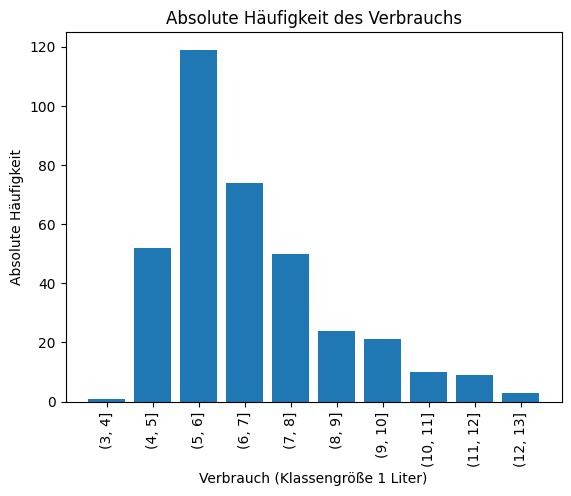

In [71]:
import matplotlib.pyplot as plt

# Annahme: Dein DataFrame hat eine Spalte namens "Verbrauch"
# Hier erstellen wir Klassengrößen von 2 Litern
klassengroessen = range(3, int(benzinkfz['Verbrauch'].max()) + 1, 1)

# Berechne die absolute Häufigkeit pro Klasse
absolute_haeufigkeit = pd.cut(benzinkfz['Verbrauch'], bins=klassengroessen).value_counts().sort_index()

# Erstelle das Balkendiagramm
plt.bar(absolute_haeufigkeit.index.astype(str), absolute_haeufigkeit)

# Beschriftungen hinzufügen
plt.xlabel('Verbrauch (Klassengröße 1 Liter)')
plt.ylabel('Absolute Häufigkeit')
plt.title('Absolute Häufigkeit des Verbrauchs')

# Die x-Achsenwerte werden um 90Crad gedreht
plt.tick_params(axis='x', rotation=90)

# Zeige das Diagramm an
plt.show()

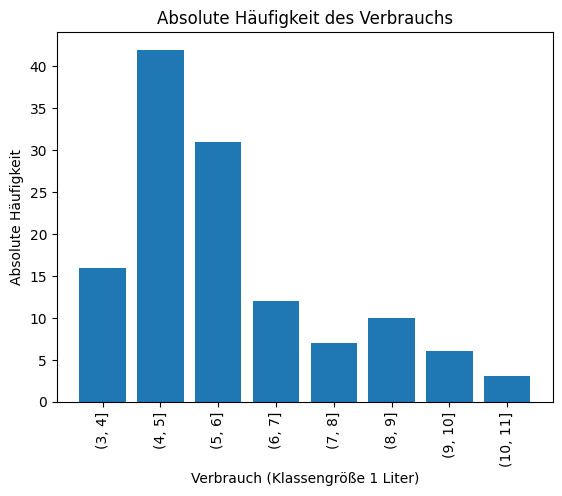

In [72]:
import matplotlib.pyplot as plt

# Annahme: Dein DataFrame hat eine Spalte namens "Verbrauch"
# Hier erstellen wir Klassengrößen von 2 Litern
klassengroessen = range(3, int(dieselkfz['Verbrauch'].max()) + 1, 1)

# Berechne die absolute Häufigkeit pro Klasse
absolute_haeufigkeit = pd.cut(dieselkfz['Verbrauch'], bins=klassengroessen).value_counts().sort_index()

# Erstelle das Balkendiagramm
plt.bar(absolute_haeufigkeit.index.astype(str), absolute_haeufigkeit)

# Beschriftungen hinzufügen
plt.xlabel('Verbrauch (Klassengröße 1 Liter)')
plt.ylabel('Absolute Häufigkeit')
plt.title('Absolute Häufigkeit des Verbrauchs')

# Die x-Achsenwerte werden um 90Crad gedreht
plt.tick_params(axis='x', rotation=90)

# Zeige das Diagramm an
plt.show()

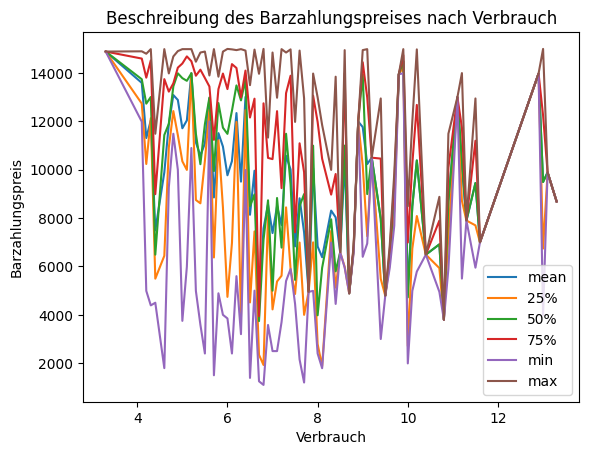

In [78]:
import matplotlib.pyplot as plt
import pandas as pd



# Statistische Kennzahlen für den Barzahlungspreis für jede Verbrauchsausprägung
statistiken_nach_verbrauch = benzinkfz.groupby('Verbrauch')['Barzahlungspreis'].describe()

# Erstelle ein Liniendiagramm für den Durchschnittspreis (mean),
# 25%, 50%, 75%, Min und Max
statistiken_nach_verbrauch[['mean', '25%', '50%', '75%', 'min', 'max']].plot(kind='line')

# Beschriftungen hinzufügen
plt.xlabel('Verbrauch')
plt.ylabel('Barzahlungspreis')
plt.title('Beschreibung des Barzahlungspreises nach Verbrauch')

# Zeige das Diagramm an
plt.show()

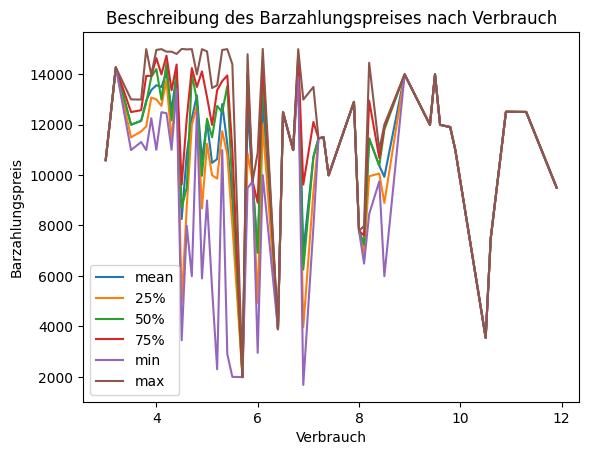

In [79]:
import matplotlib.pyplot as plt
import pandas as pd



# Statistische Kennzahlen für den Barzahlungspreis für jede Verbrauchsausprägung
statistiken_nach_verbrauch = dieselkfz.groupby('Verbrauch')['Barzahlungspreis'].describe()

# Erstelle ein Liniendiagramm für den Durchschnittspreis (mean),
# 25%, 50%, 75%, Min und Max
statistiken_nach_verbrauch[['mean', '25%', '50%', '75%', 'min', 'max']].plot(kind='line')

# Beschriftungen hinzufügen
plt.xlabel('Verbrauch')
plt.ylabel('Barzahlungspreis')
plt.title('Beschreibung des Barzahlungspreises nach Verbrauch')

# Zeige das Diagramm an
plt.show()

In [81]:
# Annahme: Dein DataFrame hat eine Spalte namens "Barzahlungspreis"
# Finde den Index (Zeilennummer) des billigsten Gebrauchtwagens
index_des_billigsten = df['Barzahlungspreis'].idxmax()

# Greife auf die gesamte Zeile des billigsten Gebrauchtwagens zu
billigster_gebrauchtwagen = df.loc[index_des_billigsten]

# Gib die Informationen zum billigsten Gebrauchtwagen aus
print("Informationen zum billigsten Gebrauchtwagen:")
print(billigster_gebrauchtwagen)

Informationen zum billigsten Gebrauchtwagen:
Verbrauch                13.0
Hersteller           Chrysler
CO₂-Emissionen2           307
Fahrzeughalter              5
Schadstoffklasse            4
Barzahlungspreis        14999
Sitzplätze                  5
Türen                       5
Kilometerstand         241000
Erstzulassung              18
HU                         16
Leistung                  250
Getriebe            Automatik
Kraftstoff             Benzin
Außenfarbe            Schwarz
Name: 65, dtype: object


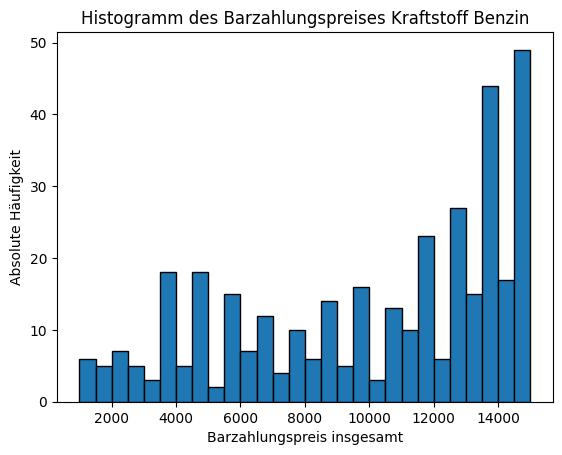

In [86]:
import matplotlib.pyplot as plt

# Annahme: Dein DataFrame hat eine Spalte namens "Barzahlungspreis" und eine Spalte "Kraftstoff"
# Hier filtern wir nach Benzin-Fahrzeugen
benzin_df = df[df['Kraftstoff'] == 'Benzin']

# Erstelle das Histogramm mit Klassen von 500€ Schritten
plt.hist(benzin_df['Barzahlungspreis'], bins=range(1000, int(benzin_df['Barzahlungspreis'].max()) + 500, 500), edgecolor='black')

# Beschriftungen hinzufügen
plt.xlabel('Barzahlungspreis insgesamt')
plt.ylabel('Absolute Häufigkeit')
plt.title('Histogramm des Barzahlungspreises Kraftstoff Benzin')

# Zeige das Diagramm an
plt.show()

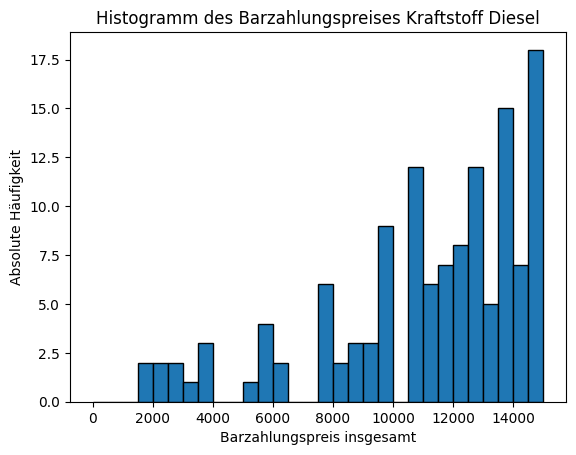

In [90]:
import matplotlib.pyplot as plt

# Annahme: Dein DataFrame hat eine Spalte namens "Barzahlungspreis" und eine Spalte "Kraftstoff"
# Hier filtern wir nach Benzin-Fahrzeugen
benzin_df = df[df['Kraftstoff'] == 'Diesel']

# Erstelle das Histogramm mit Klassen von 500€ Schritten
plt.hist(benzin_df['Barzahlungspreis'], bins=range(0, int(benzin_df['Barzahlungspreis'].max()) + 500, 500), edgecolor='black')

# Beschriftungen hinzufügen
plt.xlabel('Barzahlungspreis insgesamt')
plt.ylabel('Absolute Häufigkeit')
plt.title('Histogramm des Barzahlungspreises Kraftstoff Diesel')

# Zeige das Diagramm an
plt.show()

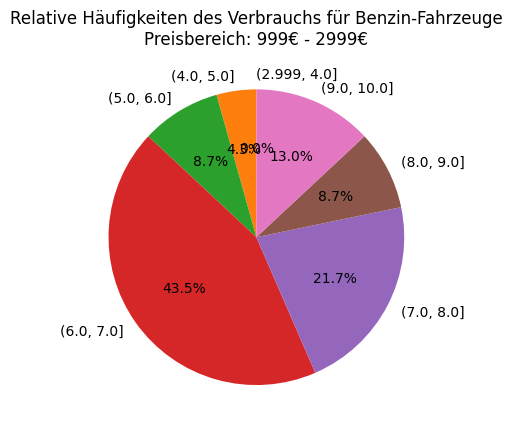

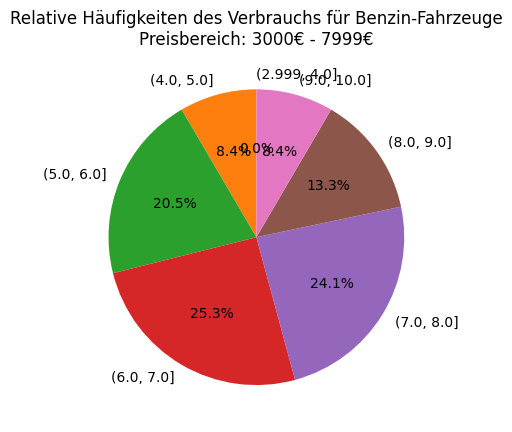

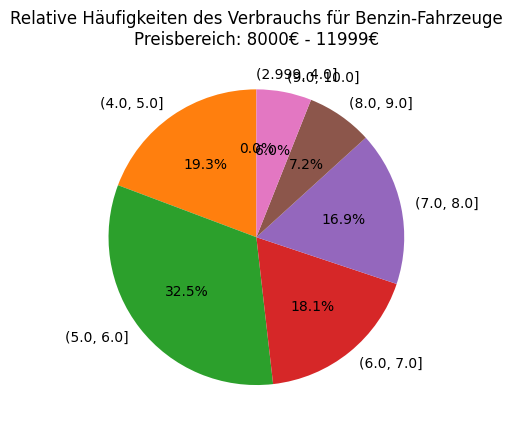

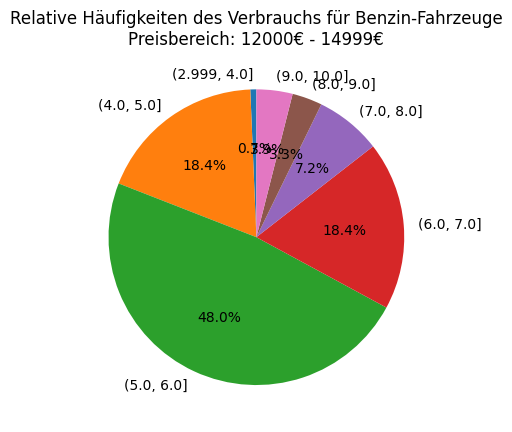

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

# Annahme: Dein DataFrame hat die Spalten "Verbrauch", "Barzahlungspreis" und "Kraftstoff"
# Hier filtern wir nach Benzin-Fahrzeugen
benzin_df = df[df['Kraftstoff'] == 'Benzin']

# Erstelle eine Funktion, um das Kuchendiagramm zu erstellen
def erstelle_kuchendiagramm(df, preisbereich):
    # Filtere nach dem Preisbereich und Benzin-Fahrzeugen
    preis_df = df[(df['Barzahlungspreis'] >= preisbereich[0]) & (df['Barzahlungspreis'] <= preisbereich[1]) & (df['Kraftstoff'] == 'Benzin')]
    
    # Berechne relative Häufigkeiten des Verbrauchs in 1-Liter-Schritten
    verbrauch_haeufigkeiten = preis_df['Verbrauch'].value_counts(normalize=True, bins=range(3, 11)).sort_index()

    # Erstelle das Kuchendiagramm
    plt.pie(verbrauch_haeufigkeiten, labels=verbrauch_haeufigkeiten.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Relative Häufigkeiten des Verbrauchs für Benzin-Fahrzeuge\nPreisbereich: {preisbereich[0]}€ - {preisbereich[1]}€')

    # Zeige das Diagramm an
    plt.show()

# Erstelle die Diagramme für die verschiedenen Preisbereiche
erstelle_kuchendiagramm(benzin_df, (999, 2999))
erstelle_kuchendiagramm(benzin_df, (3000, 7999))
erstelle_kuchendiagramm(benzin_df, (8000, 11999))
erstelle_kuchendiagramm(benzin_df, (12000, 14999))

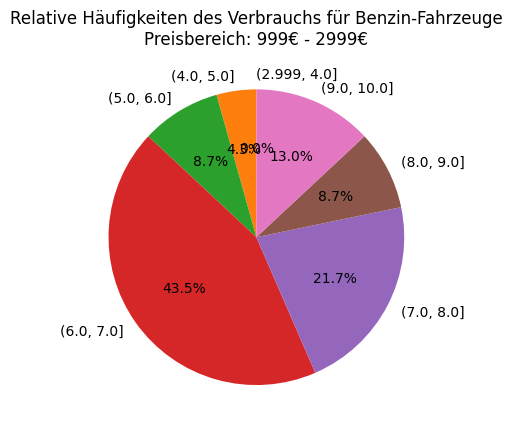

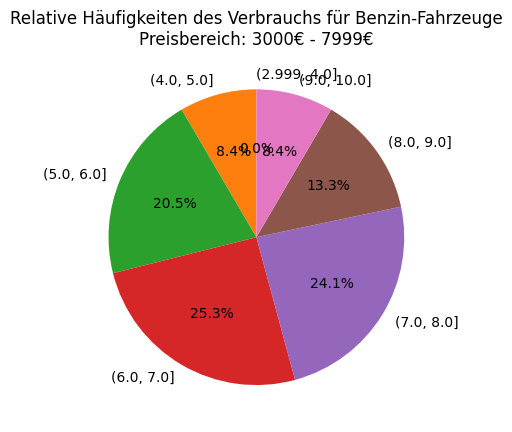

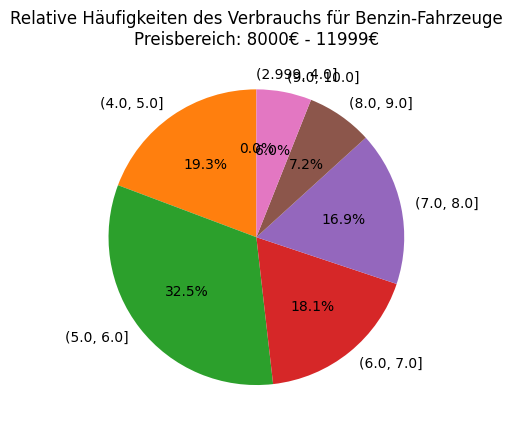

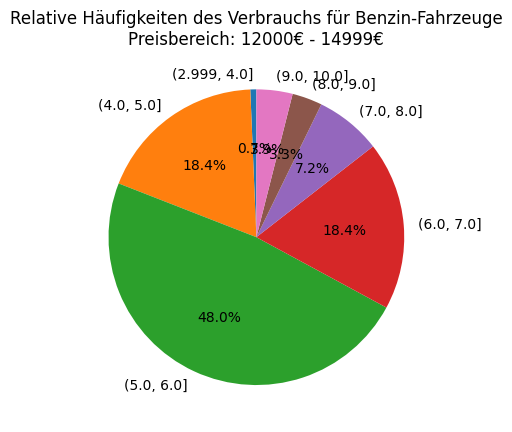

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

# Annahme: Dein DataFrame hat die Spalten "Verbrauch", "Barzahlungspreis" und "Kraftstoff"
# Hier filtern wir nach Benzin-Fahrzeugen
benzin_df = df[df['Kraftstoff'] == 'Benzin']

# Erstelle eine Funktion, um das Kuchendiagramm zu erstellen
def erstelle_kuchendiagramm(df, preisbereich):
    # Filtere nach dem Preisbereich und Benzin-Fahrzeugen
    preis_df = df[(df['Barzahlungspreis'] >= preisbereich[0]) & (df['Barzahlungspreis'] <= preisbereich[1]) & (df['Kraftstoff'] == 'Benzin')]
    
    # Überprüfe, ob es Autos in dem Bereich gibt
    if preis_df.empty:
        print(f"Keine Autos im Preisbereich {preisbereich[0]}€ - {preisbereich[1]}€ für Benzin-Fahrzeuge.")
        return
    
    # Berechne relative Häufigkeiten des Verbrauchs in 1-Liter-Schritten
    verbrauch_haeufigkeiten = preis_df['Verbrauch'].value_counts(normalize=True, bins=range(3, 11)).sort_index()

    # Erstelle das Kuchendiagramm
    plt.pie(verbrauch_haeufigkeiten, labels=verbrauch_haeufigkeiten.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Relative Häufigkeiten des Verbrauchs für Benzin-Fahrzeuge\nPreisbereich: {preisbereich[0]}€ - {preisbereich[1]}€')

    # Zeige das Diagramm an
    plt.show()

# Erstelle die Diagramme für die verschiedenen Preisbereiche
erstelle_kuchendiagramm(benzin_df, (999, 2999))
erstelle_kuchendiagramm(benzin_df, (3000, 7999))
erstelle_kuchendiagramm(benzin_df, (8000, 11999))
erstelle_kuchendiagramm(benzin_df, (12000, 14999))

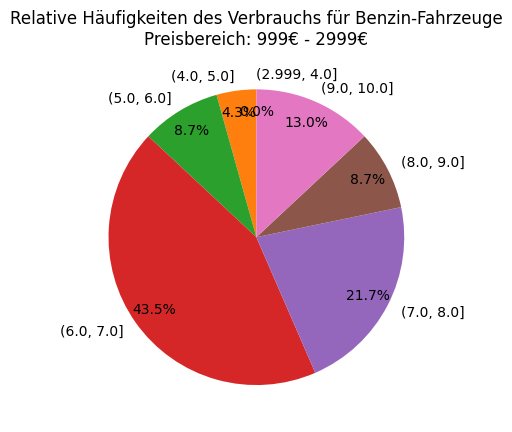

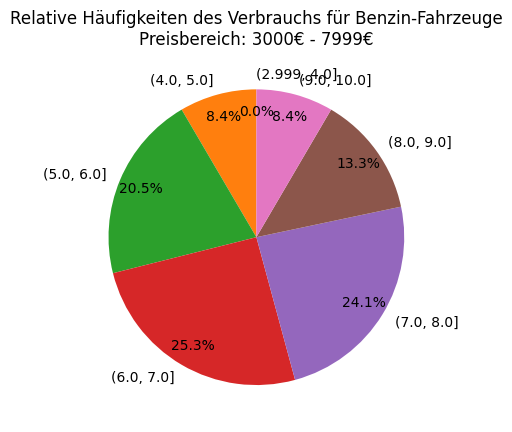

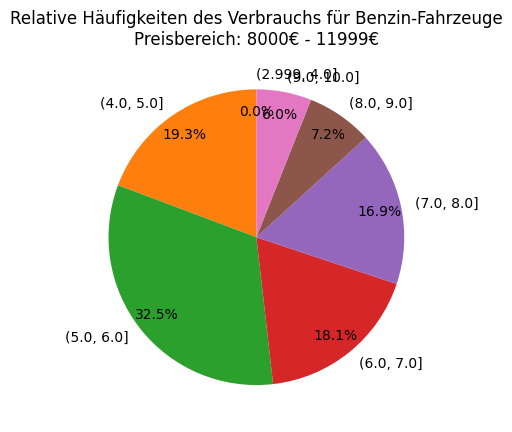

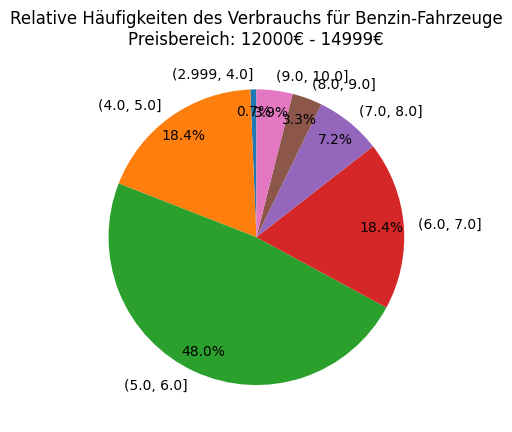

<Figure size 640x480 with 0 Axes>

In [101]:
import matplotlib.pyplot as plt
import pandas as pd

# Annahme: Dein DataFrame hat die Spalten "Verbrauch", "Barzahlungspreis" und "Kraftstoff"
# Hier filtern wir nach Benzin-Fahrzeugen
benzin_df = df[df['Kraftstoff'] == 'Benzin']

# Erstelle eine Funktion, um das Kuchendiagramm zu erstellen
def erstelle_kuchendiagramm(df, preisbereich):
    # Filtere nach dem Preisbereich und Benzin-Fahrzeugen
    preis_df = df[(df['Barzahlungspreis'] >= preisbereich[0]) & (df['Barzahlungspreis'] <= preisbereich[1]) & (df['Kraftstoff'] == 'Benzin')]
    
    # Überprüfe, ob es Autos in dem Bereich gibt
    if preis_df.empty:
        print(f"Keine Autos im Preisbereich {preisbereich[0]}€ - {preisbereich[1]}€ für Benzin-Fahrzeuge.")
        return
    
    # Berechne relative Häufigkeiten des Verbrauchs in 1-Liter-Schritten
    verbrauch_haeufigkeiten = preis_df['Verbrauch'].value_counts(normalize=True, bins=range(3, 11)).sort_index()

    # Erstelle das Kuchendiagramm mit Prozentangaben am Rand
    plt.pie(verbrauch_haeufigkeiten, labels=verbrauch_haeufigkeiten.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
    plt.title(f'Relative Häufigkeiten des Verbrauchs für Benzin-Fahrzeuge\nPreisbereich: {preisbereich[0]}€ - {preisbereich[1]}€')

    # Zeige das Diagramm an
    plt.show()

# Erstelle die Diagramme für die verschiedenen Preisbereiche
erstelle_kuchendiagramm(benzin_df, (999, 2999))
erstelle_kuchendiagramm(benzin_df, (3000, 7999))
erstelle_kuchendiagramm(benzin_df, (8000, 11999))
erstelle_kuchendiagramm(benzin_df, (12000, 14999))

# Passe die Layout-Parameter an, um Überlappungen zu vermeiden
plt.tight_layout()